In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for data preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder

# for imputing missing values
from sklearn.impute import SimpleImputer,KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for machine learning
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV

# Given that we anticipate solving our dependent feature through classification, we will proceed to import libraries tailored for classification tasks.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier

# for classification evaluation metrices
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,precision_score,mean_squared_error,r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/CodeAlpha Internship Edeme/Hear Disease Prediction/Data/heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [78]:
len(df)

919

### Features

In [ ]:
# expploring datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### **shape of data**

In [ ]:
# let' view the shape of the data, number of rows & columns
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 920 rows and 16 columns.


Find unique ID

In [ ]:
# take a look at id column
print(f"The minimum id in id column is {df['id'].min()} and maximum id is {df['id'].max()}.")

The minimum id in id column is 1 and maximum id is 920.


# Minimum and Maximum age

In [ ]:
# take a look at age column according to this dataset
print(f"The minimum age in age column is {df['age'].min()} and maximum age is {df['age'].max()}.")

The minimum age in age column is 28 and maximum age is 77.


### **Let's see visual representation of age column**

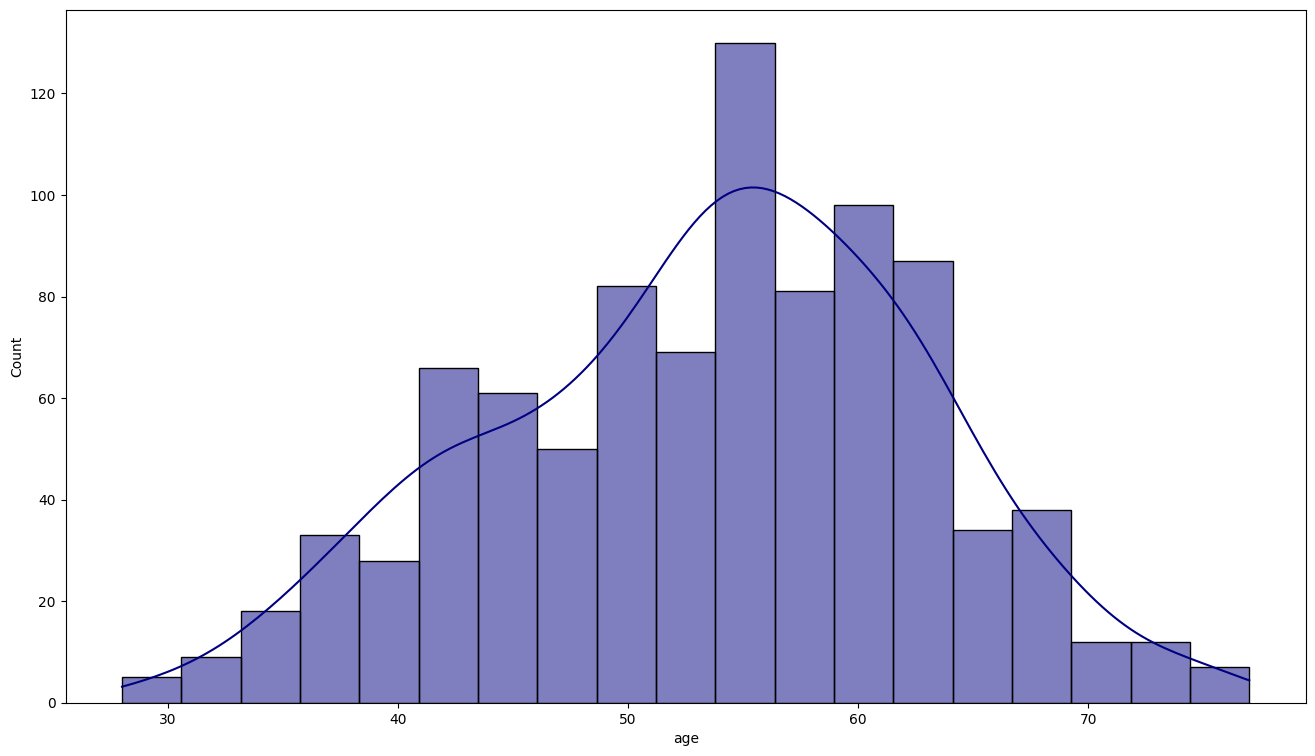

In [ ]:
# Draw a histogram to visualize the distribution of the age column
plt.figure(figsize=(16, 9))
sns.histplot(df["age"], kde=True, color="Navy")
plt.show()

Mean: 53.51086956521739
Median: 54.0
Mode: 54


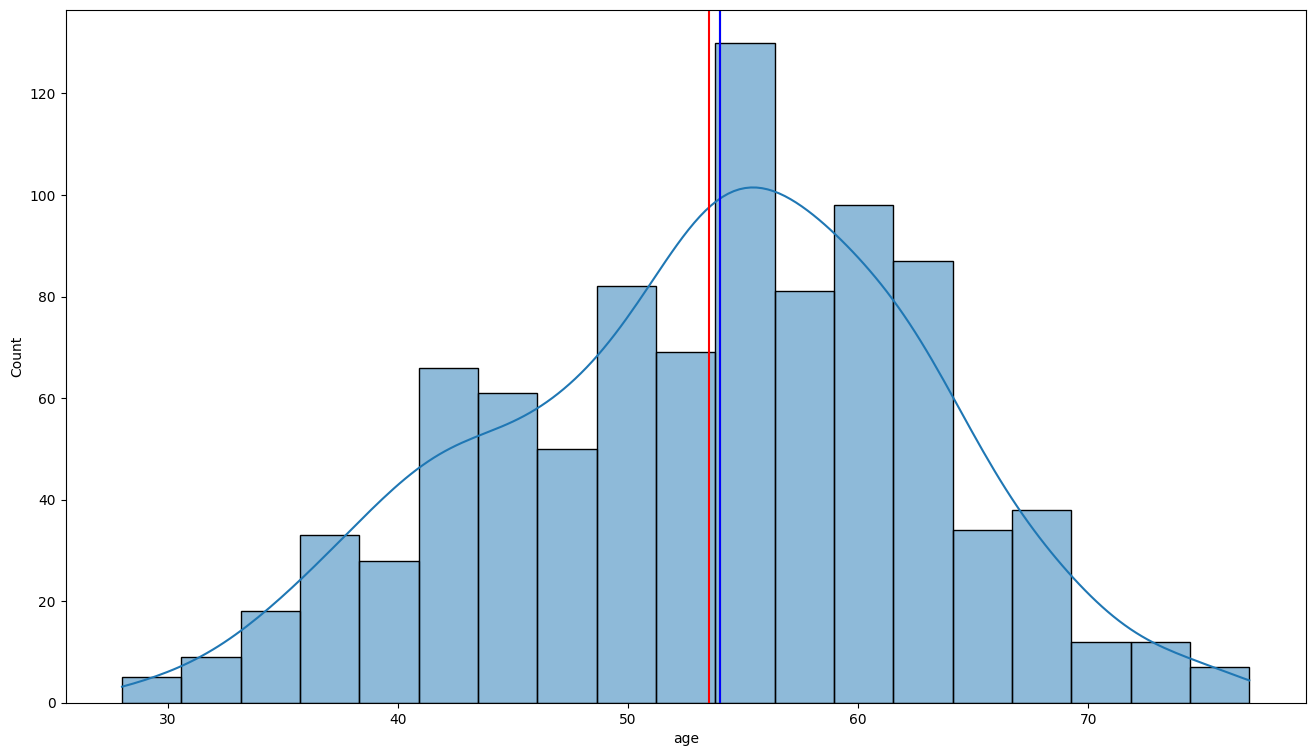

In [ ]:
# Set the figure size to 16:9
plt.figure(figsize=(16, 9))

# Plot the mean, median and mode of each column using sns
sns.histplot(df["age"], kde=True)
plt.axvline(df["age"].mean(), color="r")
plt.axvline(df["age"].median(), color="g")
plt.axvline(df["age"].mode()[0], color="b")


# Print the mean, median and mode of each column
print("Mean:", df["age"].mean())
print("Median:", df["age"].median())
print("Mode:", df["age"].mode()[0])

# Exploring sex (Male/Female) Feature

In [ ]:
# find the count of male and female in sex column
df["sex"].value_counts()

,count
sex,
Male,726
Female,194


### **Calculate Percentage of Males and Females in sex column**

In [ ]:
# calculate percentage of male and female in sex column
male = 726
female = 194
total = male + female

# calculate percentage
male_percentage = (male/total) * 100
female_percentage = (female/total) * 100

# print the result
print(f"Male Percentage in data: {male_percentage:.2f}%")
print(f"Female Percentage in data: {female_percentage:.2f}%")

# difference
difference_peercentage = ((male - female)/ female) * 100
print(f"Males are {difference_peercentage:.2f}% more than females in the data.")

Male Percentage in data: 78.91%
Female Percentage in data: 21.09%
Males are 274.23% more than females in the data.


# Exploring dataset (Place of study)

In [ ]:
# let's find unique values count in dataset column
print("Unique values count in dataset column:",df["dataset"].value_counts())

Unique values count in dataset column: dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


### **Let's visualize dataset Column**

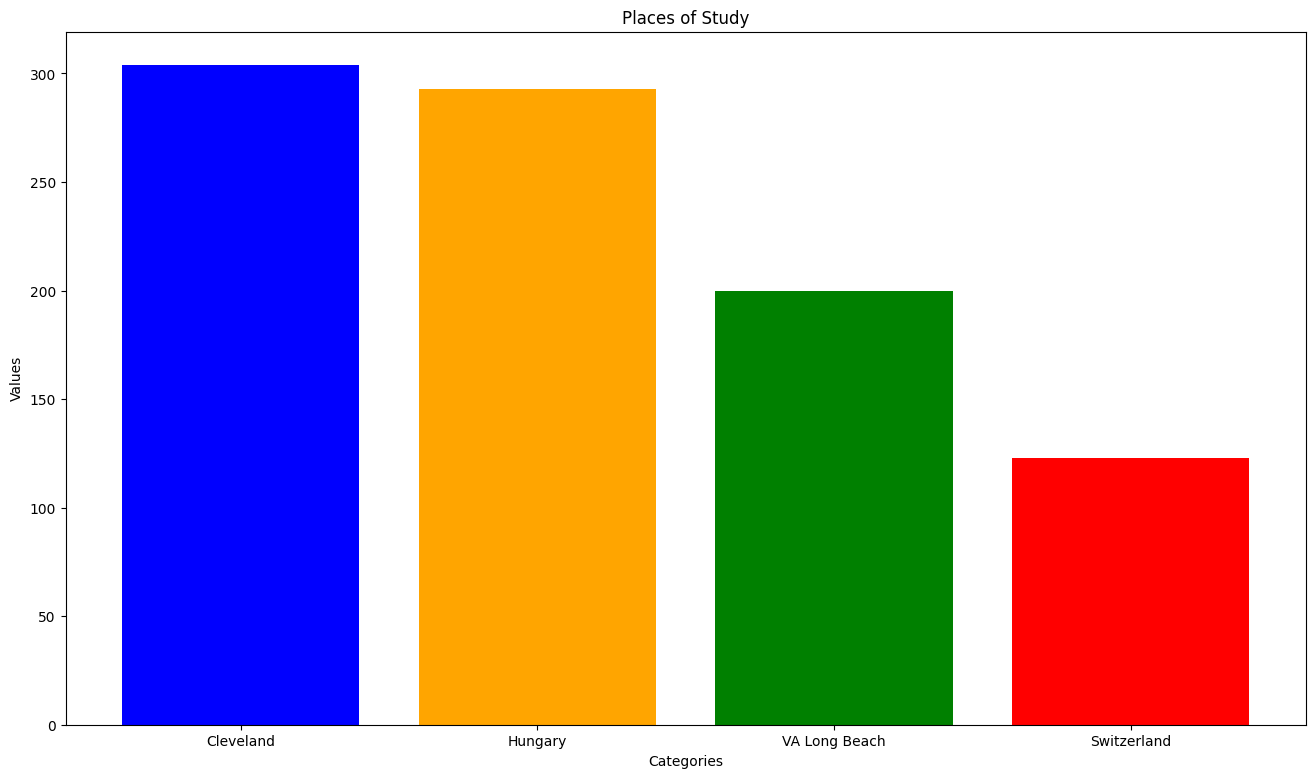

In [ ]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding values
categories = ['Cleveland', 'Hungary', 'VA Long Beach', 'Switzerland']
values = [304, 293, 200, 123]
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot
plt.figure(figsize=(16, 9))
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Places of Study')

# Show plot
plt.show()


### **Print the values count of the dataset column grouped by sex**

In [ ]:
print(df.groupby("sex")["dataset"].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [ ]:
# let's check value count of cp column
print("Value count of cp column:",df["cp"].value_counts())

Value count of cp column: cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


### **Let's visualize cp on basis of dataset**

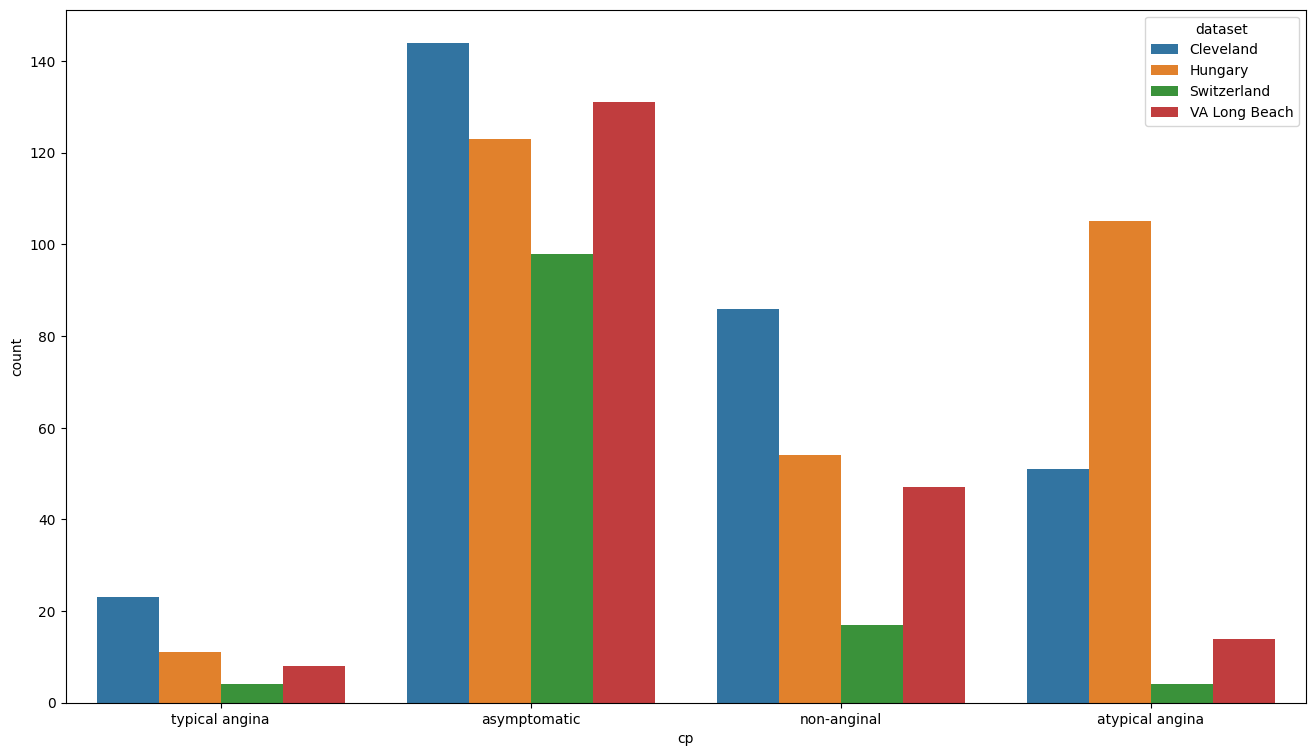

In [ ]:
# Set the figure size
plt.figure(figsize=(16, 9))

# Create the count plot
sns.countplot(data=df, x="cp", hue="dataset")

# Display the plot
plt.show()

### **Let's visualize age on basis of cp**

In [ ]:
# draw the plot of age column grouped by cp column using plotly
fig_3 = px.histogram(data_frame=df,x="age",color="cp")
fig_3.show()

# Exploring trestbps Resting blood pressure (in mm Hg on admission to the hospital)

In [ ]:
# let's check summary of trestbps
df["trestbps"].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


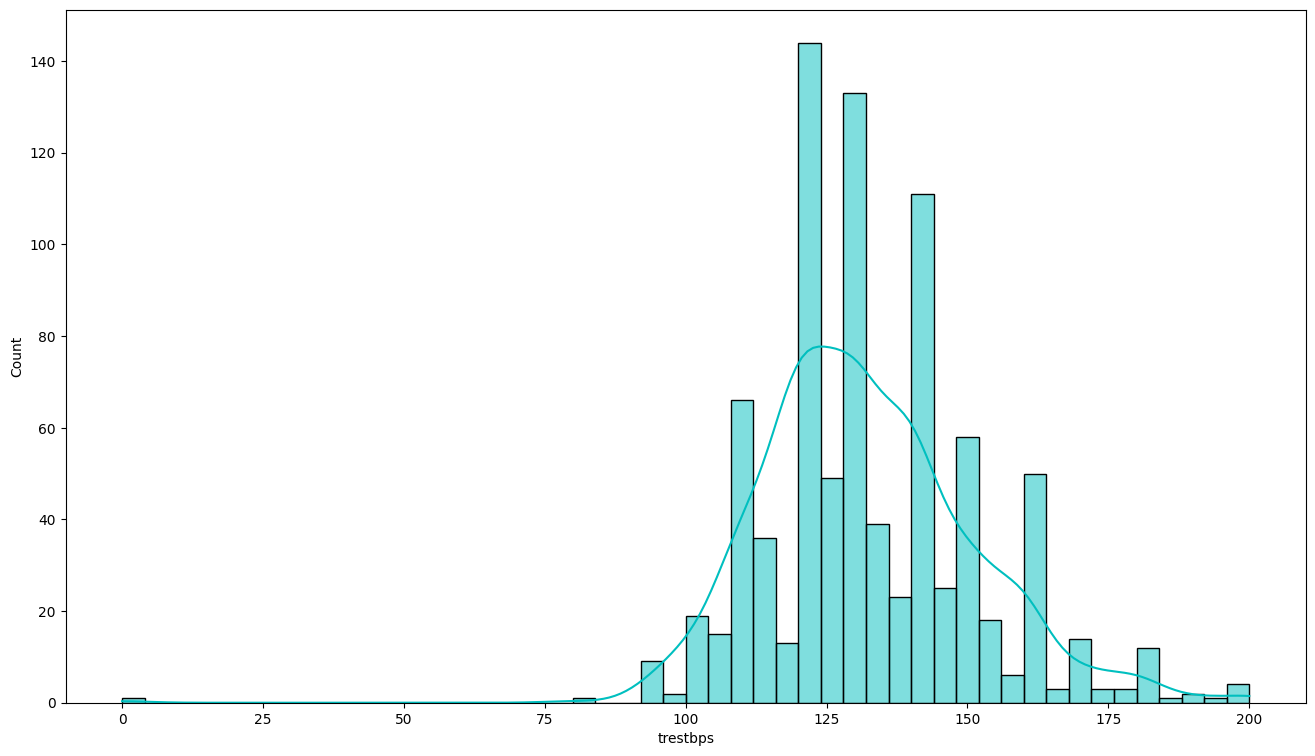

In [ ]:
# Set the figure size to 16x9
plt.figure(figsize=(16, 9))

# Create a histplot of the trestbps column with a KDE overlay
sns.histplot(data=df, x="trestbps", kde=True, bins=50, color='c')

# Display the plot
plt.show()


# **<font color='blue'>Exploring `chol`	Serum cholesterol in mg/dl </font>**

In [ ]:
df["chol"].value_counts()

,count
chol,
0.0,172
220.0,10
254.0,10
204.0,9
219.0,9
...,...
165.0,1
337.0,1
333.0,1


In [ ]:
# let's check summary of chol
df["chol"].describe()

,chol
count,890.000000
mean,199.130337
std,110.780810
min,0.000000
25%,175.000000
50%,223.000000
75%,268.000000
max,603.000000


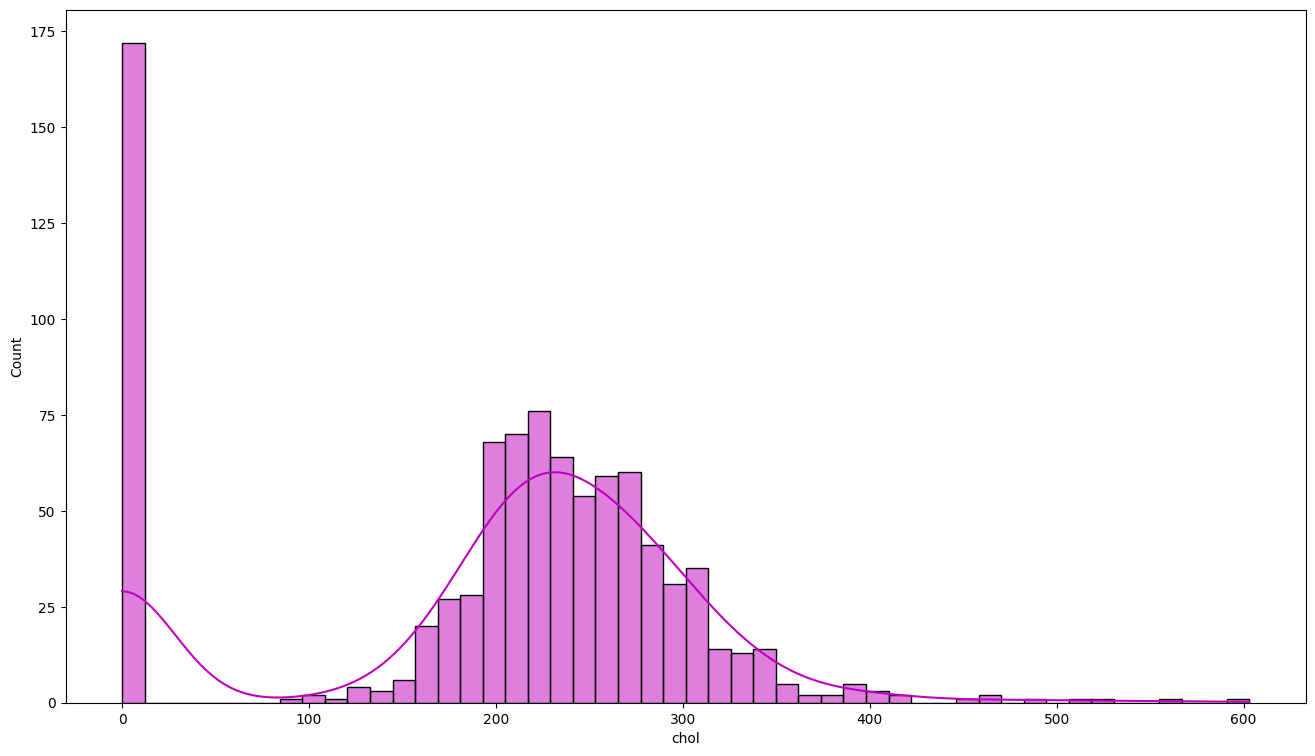

In [ ]:
# Set the figure size to 16x9
plt.figure(figsize=(16, 9))

# Create a histplot of the chol column with a KDE overlay
sns.histplot(data=df, x="chol", kde=True, bins=50, color='m')

# Display the plot
plt.show()

In [ ]:
df["fbs"].value_counts()

,count
fbs,
False,692
True,138


### **Let's Visualize fbs**

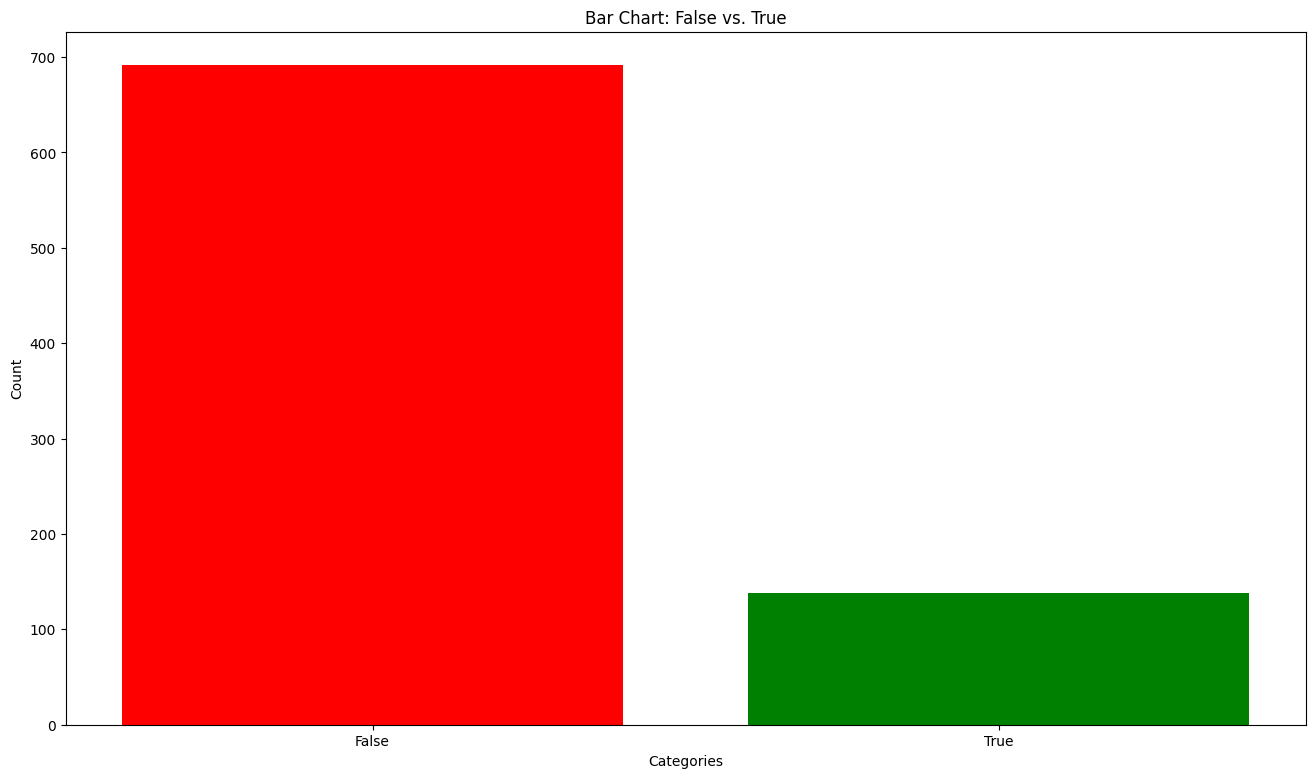

In [ ]:
categories = ['False', 'True']
counts = [692, 138]

# Create a bar chart
plt.figure(figsize=(16, 9))  # Set the plot size
plt.bar(categories, counts, color=['red', 'green'])  # Different colors for True and False
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart: False vs. True')
plt.show()


In [ ]:
df["restecg"].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


### **Let's Visualize restecg**

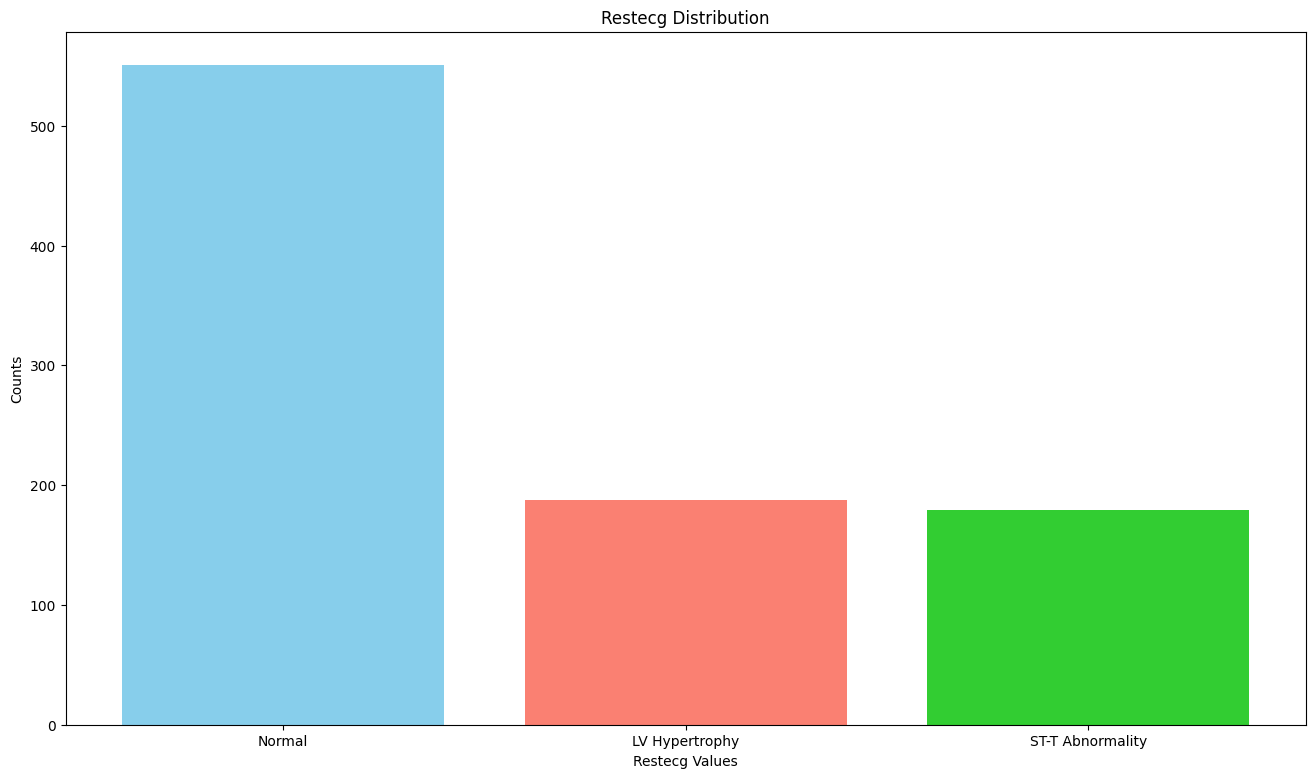

In [ ]:
import matplotlib.pyplot as plt

values = ["Normal", "LV Hypertrophy", "ST-T Abnormality"]
counts = [551, 188, 179]

# Custom colors for bars
colors = ["skyblue", "salmon", "limegreen"]

# Create the bar chart
plt.figure(figsize=(16, 9))
plt.bar(values, counts, color=colors)
plt.xlabel("Restecg Values")
plt.ylabel("Counts")
plt.title("Restecg Distribution")
plt.show()



# Exploring thalch Maximum heart rate achieved

In [ ]:
df["thalch"].value_counts()

,count
thalch,
150.0,43
140.0,41
120.0,35
130.0,30
160.0,26
...,...
63.0,1
67.0,1
107.0,1


In [ ]:
# let's check summary of thalch
df["thalch"].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


### **Let's Visualize thalch**

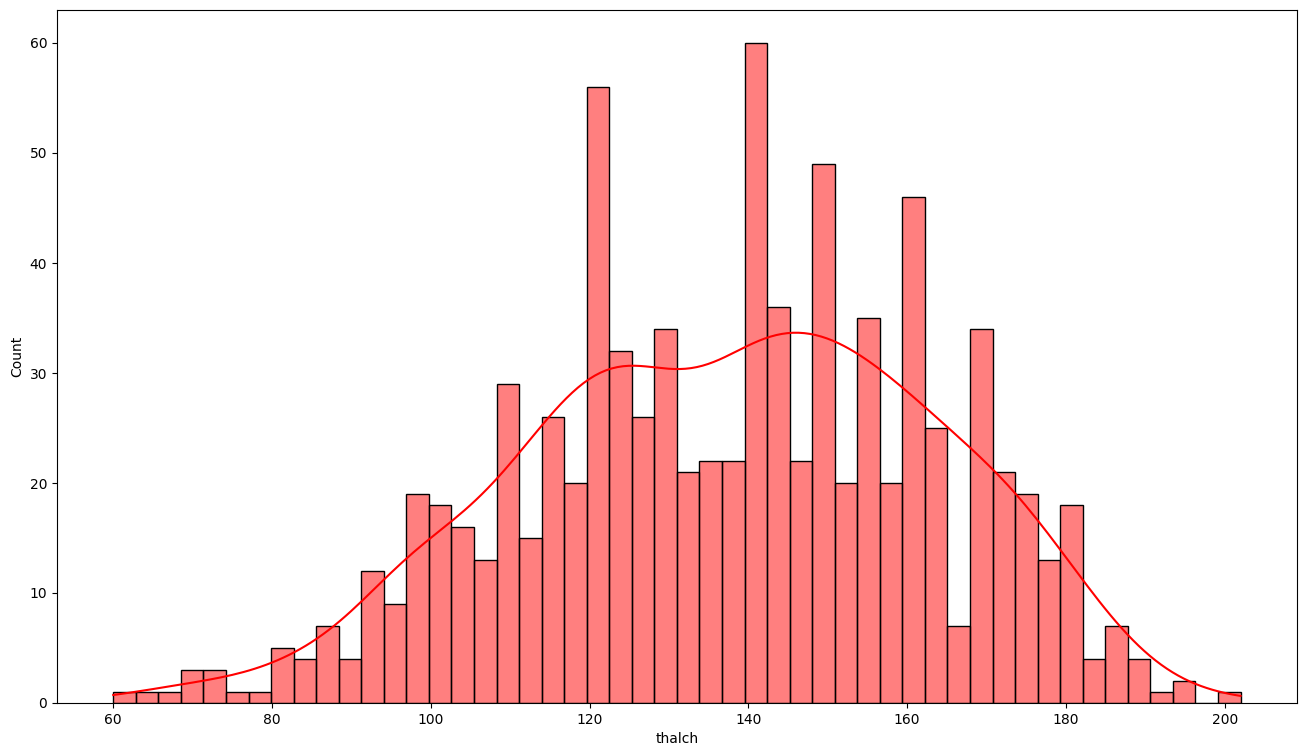

In [ ]:
# Set the figure size to 16x9
plt.figure(figsize=(16, 9))

# Create a histplot of the thalch column with a KDE overlay
sns.histplot(data=df, x="thalch", kde=True, bins=50, color='r')

# Display the plot
plt.show()

# Exploring exang Exercise-induced angina (True/ False)

In [ ]:
df["exang"].value_counts()

,count
exang,
False,528
True,337


#### **Let's visualize exang**

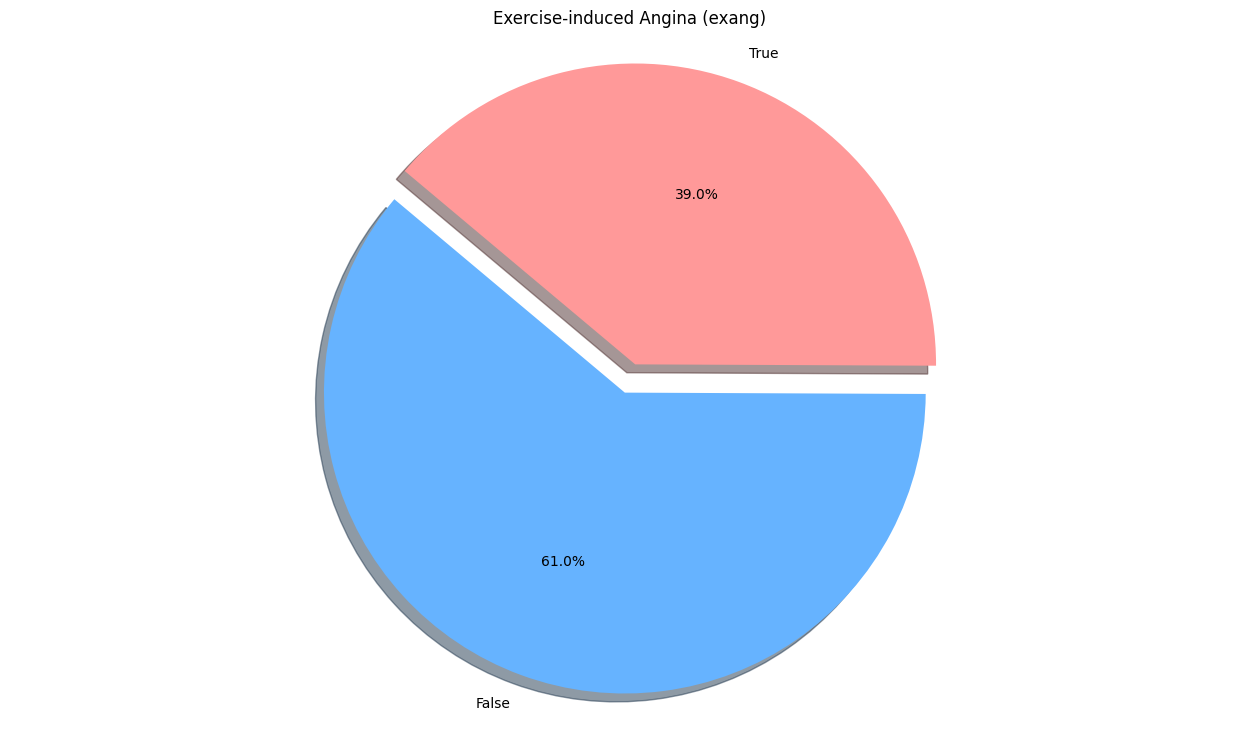

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['False', 'True']
sizes = [528, 337]
colors = ['#66b3ff', '#ff9999']  # Awesome colors
explode = (0, 0.1)  # Slightly explode the 'True' slice for emphasis

# Create a pie chart
plt.figure(figsize=(16, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Exercise-induced Angina (exang)')

# Show the plot
plt.show()


# Exploring oldpeak ST depression induced by exercise relative to rest

In [ ]:
df["oldpeak"].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


In [ ]:
# let's check summary of oldpeak
df["oldpeak"].describe()

,oldpeak
count,858.000000
mean,0.878788
std,1.091226
min,-2.600000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


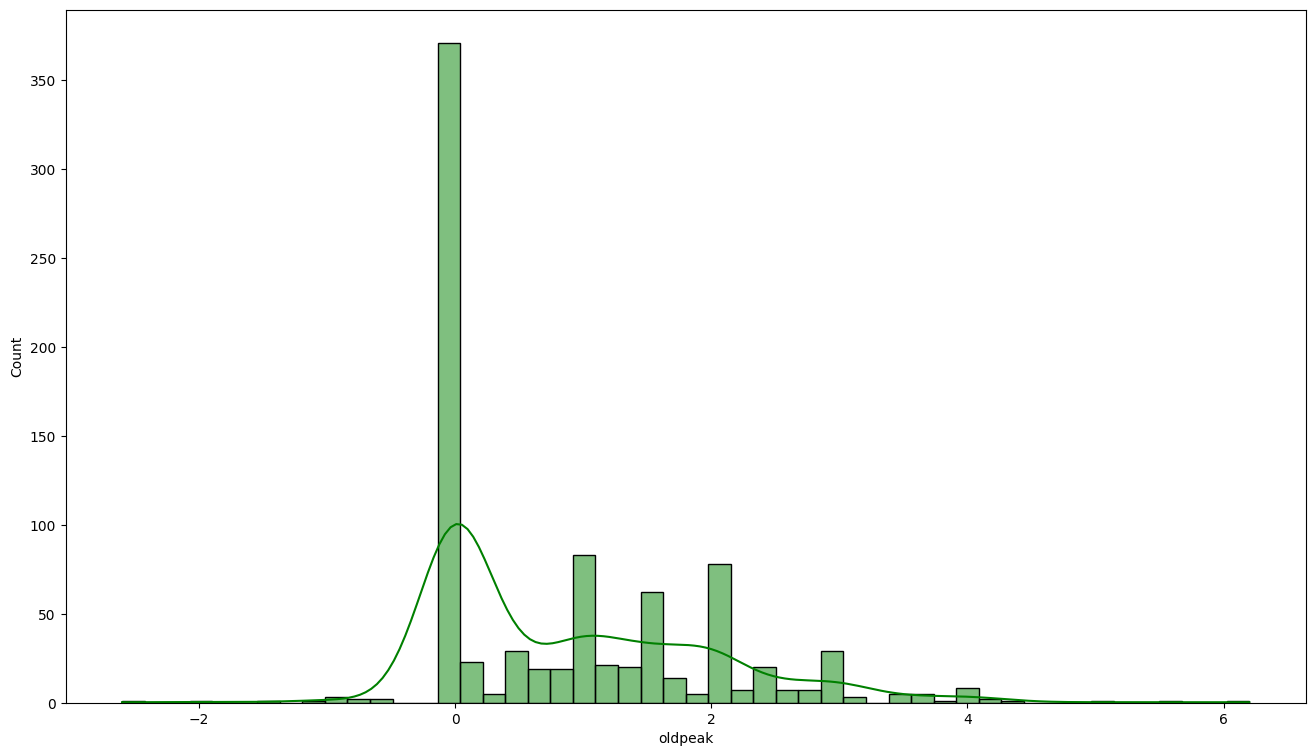

In [ ]:
# Set the figure size to 16x9
plt.figure(figsize=(16, 9))

# Create a histplot of the thalch column with a KDE overlay
sns.histplot(data=df, x="oldpeak", kde=True, bins=50, color='g')

# Display the plot
plt.show()

# Exploring slope The slope of the peak exercise ST segment

In [ ]:
df["slope"].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


### **Let's Visualize slope**

In [ ]:
import plotly.graph_objects as go

# Data
slope_data = {
    "flat": 345,
    "upsloping": 203,
    "downsloping": 63
}

# Create the figure
fig = go.Figure()

# Add a scatter plot (line plot)
fig.add_trace(go.Scatter(x=list(slope_data.keys()), y=list(slope_data.values()), mode='lines+markers', name='Slope'))

# Customize the plot
fig.update_layout(
    title="Slope of the Peak Exercise ST Segment",
    xaxis_title="Slope Type",
    yaxis_title="Count",
    showlegend=True
)

# Show the plot
fig.show()


# Exploring ca Number of major vessels (0-3) colored by fluoroscopy


In [ ]:
df["ca"].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


### **Let's Visualize ca**

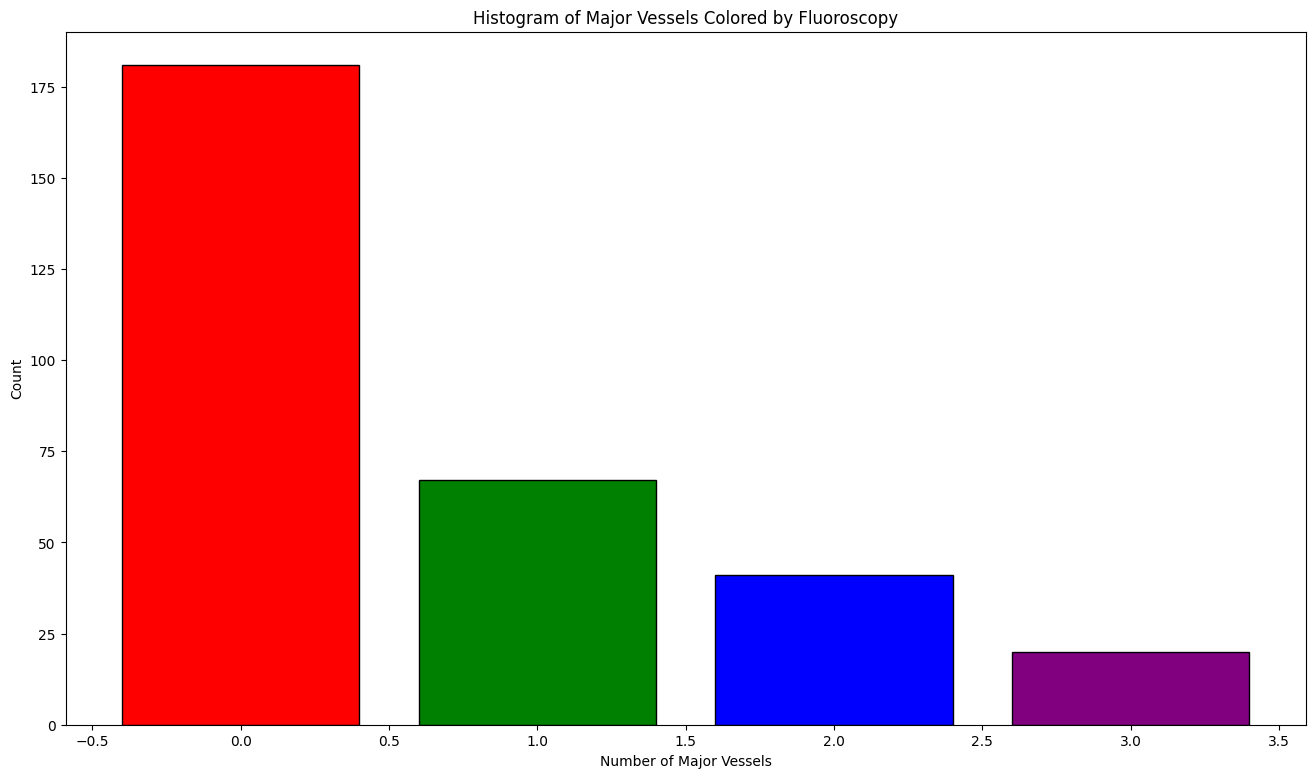

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = [0.0, 1.0, 2.0, 3.0]
counts = [181, 67, 41, 20]
colors = ['red', 'green', 'blue', 'purple']

# Create the figure with the specified size
plt.figure(figsize=(16, 9))

# Create the histogram with specified colors
plt.bar(categories, counts, color=colors, edgecolor="black")

# Labels and title
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Histogram of Major Vessels Colored by Fluoroscopy")

# Show the plot
plt.show()


# Exploring thal Thalassemia (Values: normal, fixed defect, reversible defect

In [ ]:
df["thal"].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


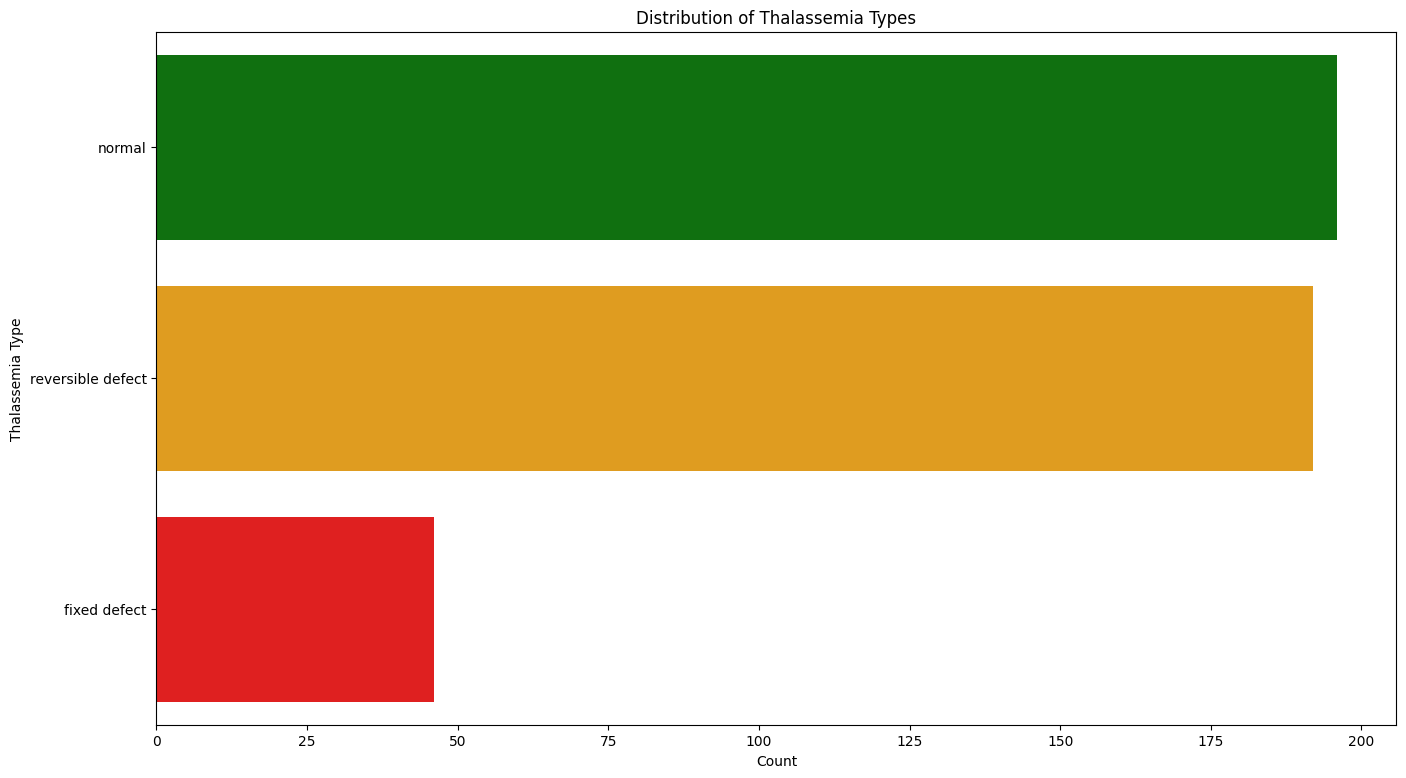

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Data
thal_values = ['normal'] * 196 + ['reversible defect'] * 192 + ['fixed defect'] * 46

# Plot
plt.figure(figsize=(16, 9))
sns.countplot(y=thal_values, palette=['green', 'orange', 'red'])
plt.xlabel('Count')
plt.ylabel('Thalassemia Type')
plt.title('Distribution of Thalassemia Types')
plt.show()



# Exploring num The predicted attribute, target [0=no heart disease; 1,2,3,4 = stages of heart disease ])


In [ ]:
df["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


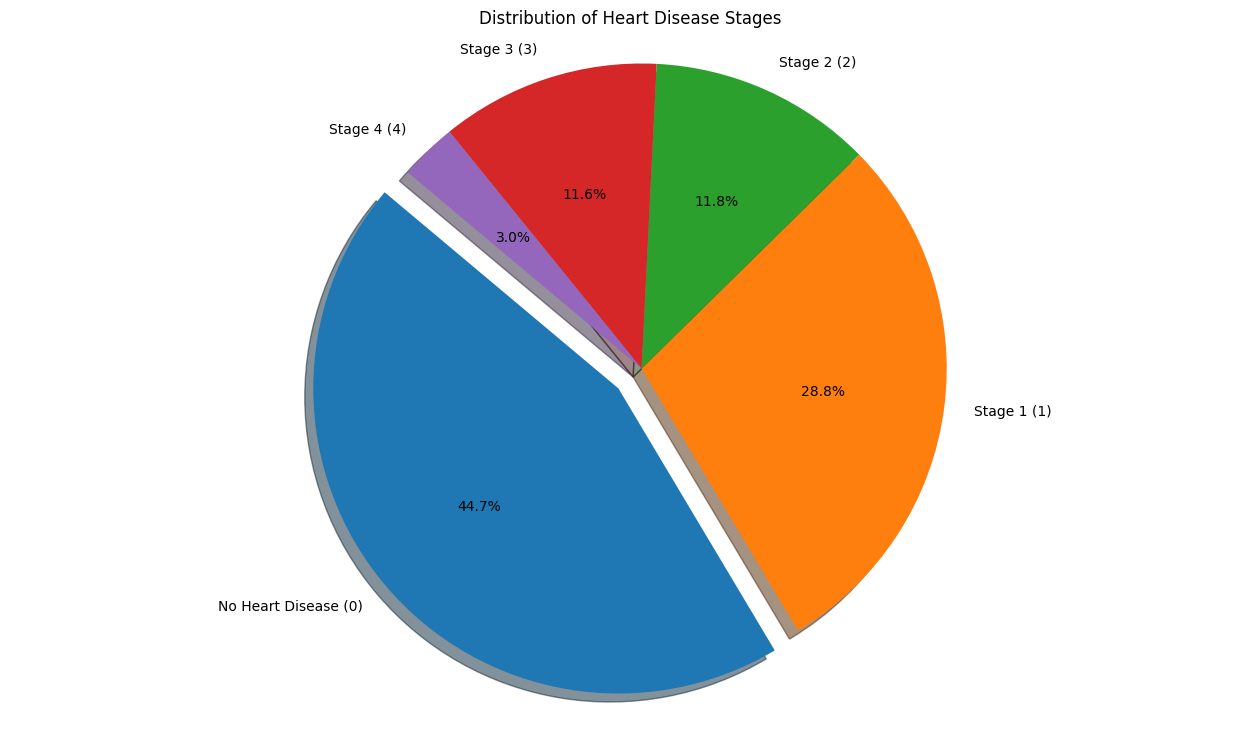

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['No Heart Disease (0)', 'Stage 1 (1)', 'Stage 2 (2)', 'Stage 3 (3)', 'Stage 4 (4)']
sizes = [411, 265, 109, 107, 28]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
explode = (0.1, 0, 0, 0, 0)  # explode the 1st slice (No Heart Disease)

# Plot
plt.figure(figsize=(16, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Heart Disease Stages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



# **<font color='blue'>Dealing with Missing Values in Dataset</font>**


### **Let's visualize to see missing values in this dataset**

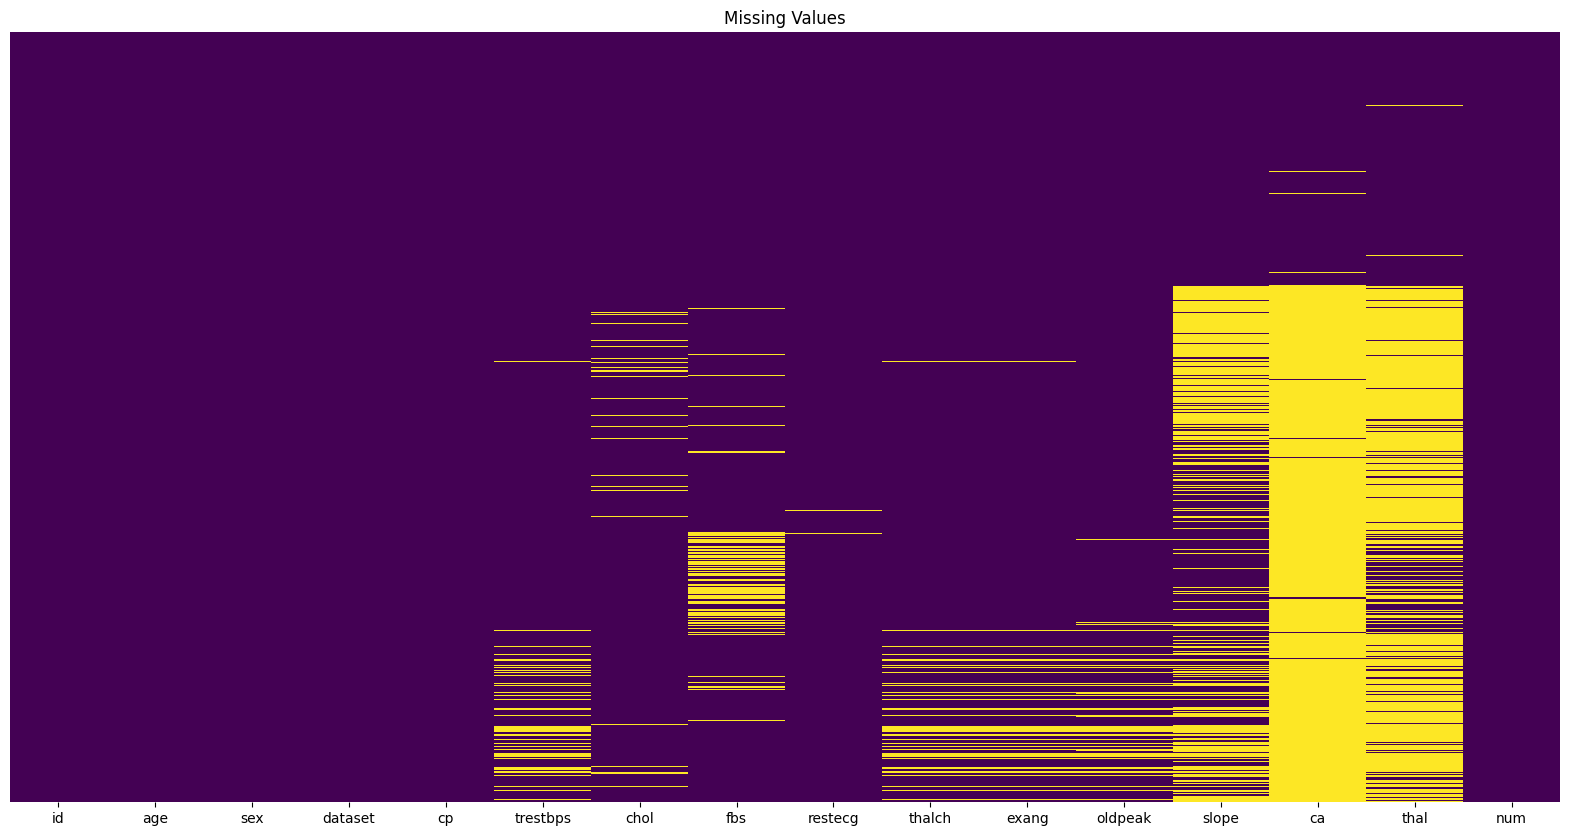

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [ ]:
# Let check colmns with missing values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


### **Convert column with missing values into a list**

In [ ]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.to_list()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### **Seperating columns based upon their data types**

In [ ]:
categorical_cols = ["thal","ca","exang","slope","restecg","fbs","cp","sex","num"]
bool_cols = ["fbs","exang"]
numeric_cols = ["oldpeak","thalch","chol","trestbps","age"]

In [ ]:
# define the function to impute the missing values
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

### **Let's Check Missing Values Again**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


### **Let's impute missing values using our function**

In [ ]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.286531791907512 

RMSE = 296.551839884393 

R2 = 0.07406943577857039 

Missing Values chol : 3.26%
MAE = 45.23719101123595 

RMSE = 4021.933983146068 

R2 = 0.6813942692152466 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 67.39 accuracy

Missing Values thalch : 5.98%
MAE = 16.93982658959538 

RMSE = 478.84713468208105 

R2 = 0.30371633505202356 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5700872093023256 

RMSE = 0.6310169476744185 

R2 = 0.3988276892131982 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



### **Let's check missing values again**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


# Dealing with Outliers in Dataset


### **Create box plots for all numeric columns using for loop and subplot**

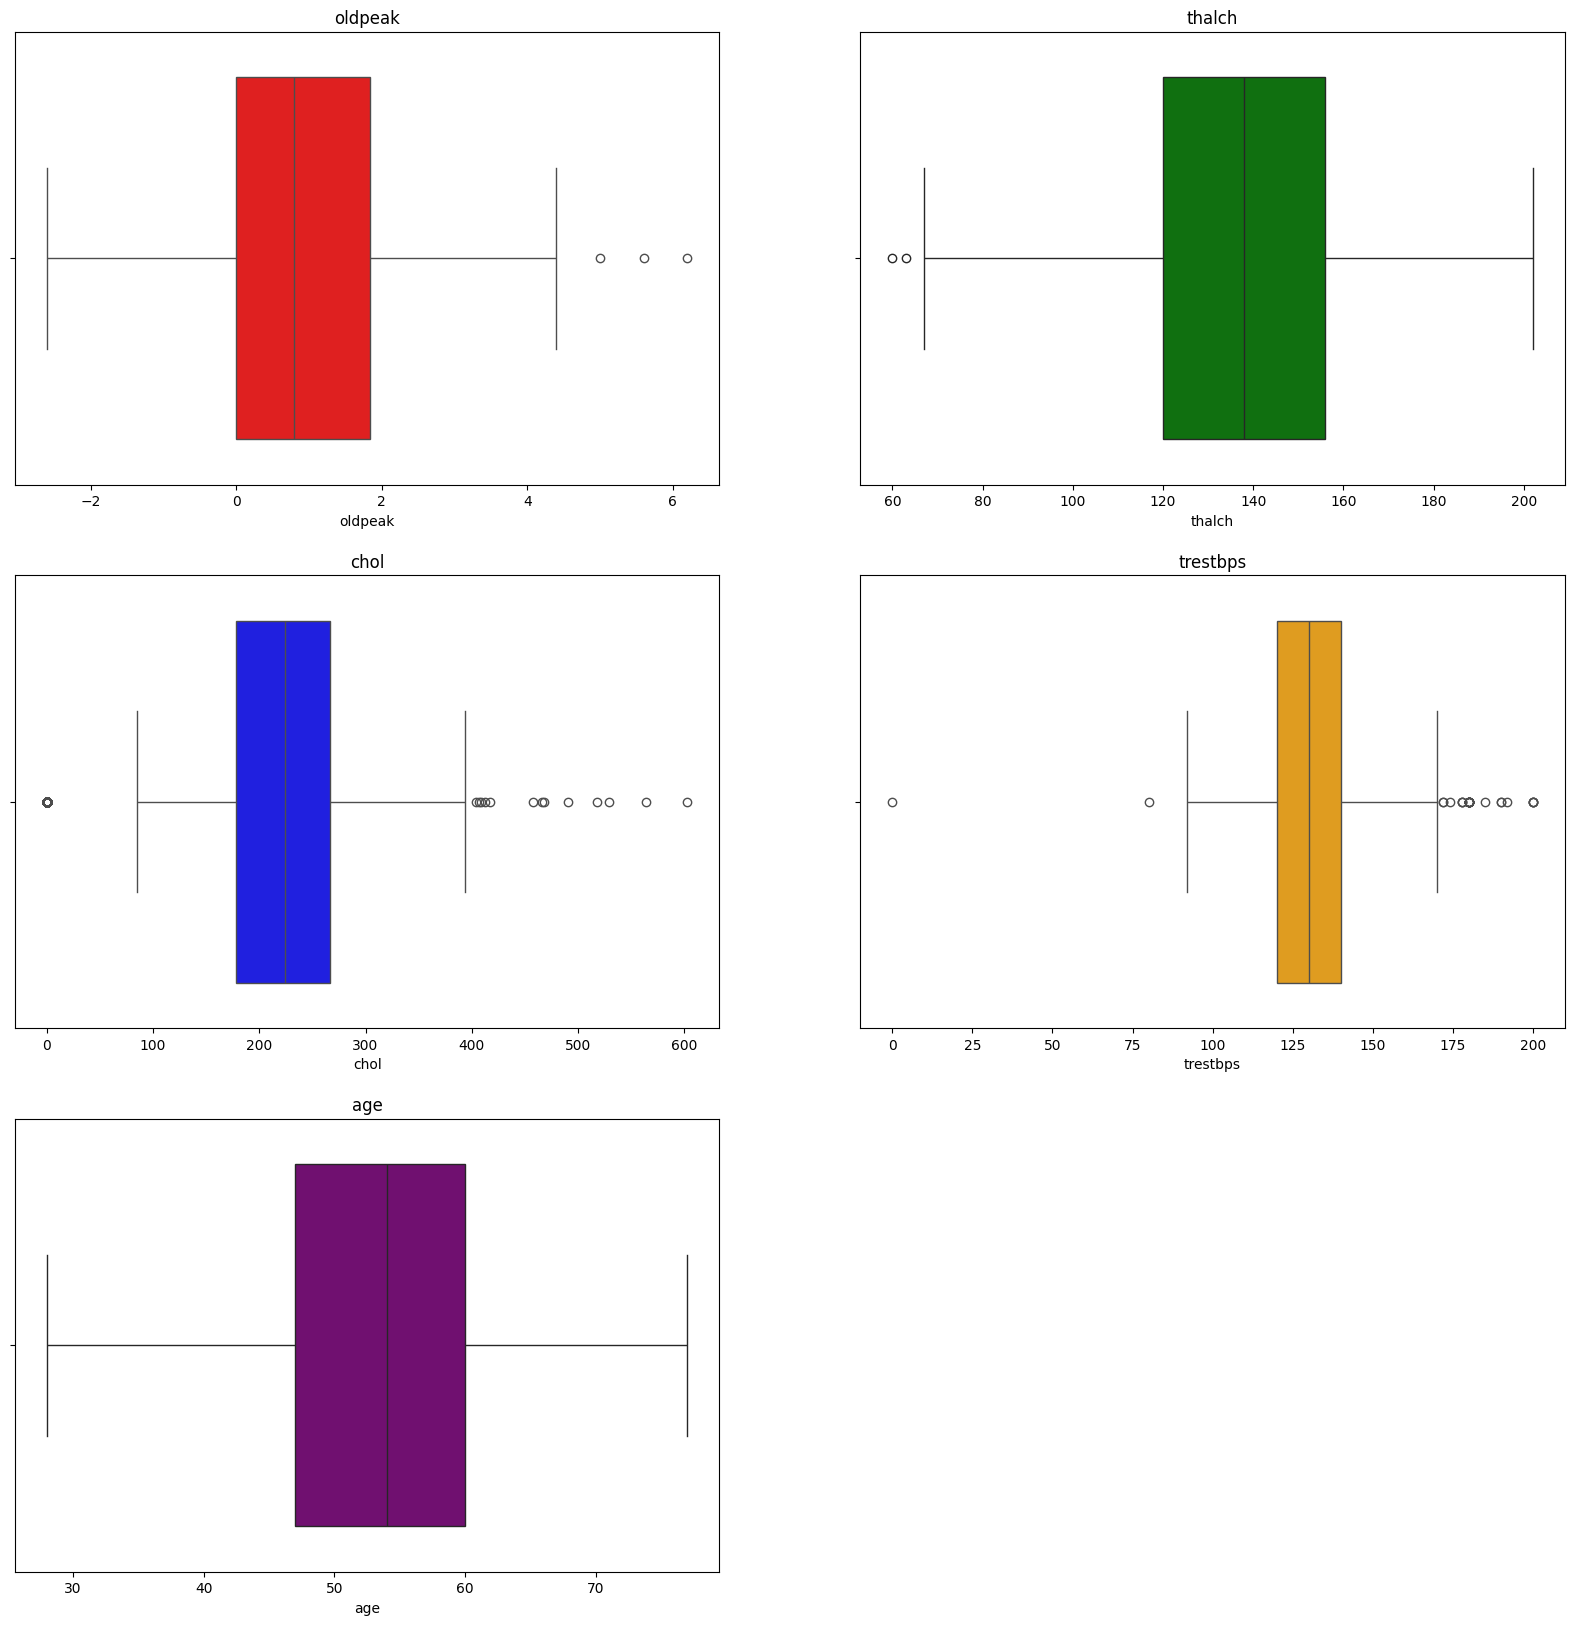

In [ ]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()



#### **Remove row where trestbps is 0**

In [ ]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

# Machine Learning on this Dataset


In [ ]:
# let's take a look at names of the columns in this dataset again
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# List of final features to keep
final_features = ['ca', 'cp', 'exang', 'slope', 'thal', 'oldpeak', 'thalch', 'age', 'chol', 'trestbps']

In [ ]:
# Selecting only the final set of features along with the target column 'num'
final_dataset = dataset[final_features + ['num']]

In [ ]:
# Display the first few rows of the updated dataset
final_dataset.head()

,ca,cp,exang,slope,thal,oldpeak,thalch,age,chol,trestbps,num
0,0.0,3,0,0,0,2.3,150.0,63,233.0,145.0,0
1,3.0,0,1,1,1,1.5,108.0,67,286.0,160.0,2
2,2.0,0,1,1,2,2.6,129.0,67,229.0,120.0,1
3,0.0,2,0,0,1,3.5,187.0,37,250.0,130.0,0
4,0.0,1,0,2,1,1.4,172.0,41,204.0,130.0,0


In [ ]:
final_dataset = df

### **Target Column**

In [ ]:
# let's take a look at num column
df["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,106
4,28


#### **Split data into X and y**

In [ ]:
# split data into X and y
X = df.drop(['num'], axis=1)
y = df['num']

### **Encode all catagorical columns using seperete label encoder for each and save it for inverse transform**

In [ ]:
# Encode all catagorical columns using seperete label encoder for each and save it for inverse transform
le = LabelEncoder()

# using for loop
for cols in X.columns:
# Task: Separate Encoder for all cat and object columns and inverse transform at the end
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
        else:
            pass

# split data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### **Here is the list of models that we will use for heart disease prediction.These models should be classifiers.We will use some of these models.**
- Logistic Regression
- Naive Bayse
- Support vector machines (svm)
- Decision Tree
- Random Forest
- KNN
- XGboost
- Adaboost
- GradiantBoost
- Catboost
- LightGBM

#### **Importing Machine Learning Libraries**

In [ ]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Let's Select the best model for prediction


In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6789115646258503
Test Accuracy: 0.6521739130434783

Model: Gradient Boosting
Cross-validation Accuracy: 0.6571428571428571
Test Accuracy: 0.657608695652174

Model: Support Vector Machine
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5306122448979591
Test Accuracy: 0.483695652173913

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])


# Save the best model


In [ ]:
import pickle
pickle.dump(best_model, open('heart_dis_model.pkl', 'wb'))